In [1]:
from bs4 import BeautifulSoup
import requests
import time
from selenium import webdriver
from selenium.webdriver.common.by import By


## Data Scraping

Accessing skincare product webpage

In [2]:
options = webdriver.ChromeOptions()
options.add_argument('--ignore-certificate-errors')
options.add_argument('--incognito')
options.add_argument('--headless')
driver = webdriver.Chrome("C:\Program Files (x86)\chromedriver.exe", chrome_options=options)
driver.get("https://www.thebodyshop.com/en-au/face/serums-essences/drops-of-youth-youth-concentrate/p/p000275")

read_ingredients = driver.find_element(By.XPATH, "//mat-expansion-panel-header[@id='mat-expansion-panel-header-1']")
driver.execute_script("arguments[0].click();", read_ingredients)
time.sleep(1)
read_full_ingredients = driver.find_element(By.XPATH, "//button[@aria-label='View full list of ingredients']")
driver.execute_script("arguments[0].click();", read_full_ingredients)
time.sleep(1)
#//mat-expansion-panel-header[@id='mat-expansion-panel-header-1']
#//button[@aria-label='View full list of ingredients']
body_shop = requests.get("https://www.thebodyshop.com/en-au/face/serums-essences/drops-of-youth-youth-concentrate/p/p000275")
ingredients = driver.page_source
soup1 = BeautifulSoup(body_shop.content, 'lxml')
soup2 = BeautifulSoup(ingredients, 'lxml')




'options = webdriver.ChromeOptions()\noptions.add_argument(\'--ignore-certificate-errors\')\noptions.add_argument(\'--incognito\')\noptions.add_argument(\'--headless\')\ndriver = webdriver.Chrome("C:\\Program Files (x86)\\chromedriver.exe", chrome_options=options)\ndriver.get("https://www.thebodyshop.com/en-au/face/serums-essences/drops-of-youth-youth-concentrate/p/p000275")\n\nread_ingredients = driver.find_element(By.XPATH, "//mat-expansion-panel-header[@id=\'mat-expansion-panel-header-1\']")\ndriver.execute_script("arguments[0].click();", read_ingredients)\ntime.sleep(1)\nread_full_ingredients = driver.find_element(By.XPATH, "//button[@aria-label=\'View full list of ingredients\']")\ndriver.execute_script("arguments[0].click();", read_full_ingredients)\ntime.sleep(1)\n#//mat-expansion-panel-header[@id=\'mat-expansion-panel-header-1\']\n#//button[@aria-label=\'View full list of ingredients\']\nbody_shop = requests.get("https://www.thebodyshop.com/en-au/face/serums-essences/drops-of-y

Gathering all necessary skincare information for one product

In [3]:
product_name = soup1.find('h1', class_='product-intro__name ng-star-inserted').get_text().lstrip()
product_navigation = soup1.findAll('a', class_='breadcrumb-link ng-star-inserted')
product_rating = soup1.find('span', class_='sr-only').get_text()
product_recommendation = soup1.find('div', class_='bv-rating-summary__recommend bv-rating-summary__stars--lg').get_text()
product_size = soup1.findAll('div', class_='price__element price__element--unit text-nowrap')
product_price = soup1.findAll('span', class_='price__element price__element--formatted')

def get_product_type(type):
    return [type.get_text() for type in product_navigation][-1]
product_type = get_product_type(product_navigation)

def get_product_size(size):
    return [size.get_text() for size in product_size]
size_list = get_product_size(product_size)

def get_product_price(price):
    return [price.get_text() for price in product_price]
price_list = [*set(get_product_price(product_price))]


product_ingredients = soup2.find('p', class_='product-key-ingredients-modal-body__text').get_text()



"product_name = soup1.find('h1', class_='product-intro__name ng-star-inserted').get_text().lstrip()\nproduct_navigation = soup1.findAll('a', class_='breadcrumb-link ng-star-inserted')\nproduct_rating = soup1.find('span', class_='sr-only').get_text()\nproduct_recommendation = soup1.find('div', class_='bv-rating-summary__recommend bv-rating-summary__stars--lg').get_text()\nproduct_size = soup1.findAll('div', class_='price__element price__element--unit text-nowrap')\nproduct_price = soup1.findAll('span', class_='price__element price__element--formatted')\n\ndef get_product_type(type):\n    return [type.get_text() for type in product_navigation][-1]\nproduct_type = get_product_type(product_navigation)\n\ndef get_product_size(size):\n    return [size.get_text() for size in product_size]\nsize_list = get_product_size(product_size)\n\ndef get_product_price(price):\n    return [price.get_text() for price in product_price]\nprice_list = [*set(get_product_price(product_price))]\n\n\nproduct_ingr

In [4]:
product_dictionary = {
    "Product Name": product_name,
    "Product Type": product_type,
    "Product Size": size_list,
    "Product Price": price_list,
    "Product Rating": product_rating,
    "Product Recommendation" : product_recommendation,
    "Ingredients List": product_ingredients
}
print(product_dictionary)

'product_dictionary = {\n    "Product Name": product_name,\n    "Product Type": product_type,\n    "Product Size": size_list,\n    "Product Price": price_list,\n    "Product Rating": product_rating,\n    "Product Recommendation" : product_recommendation,\n    "Ingredients List": product_ingredients\n}\nprint(product_dictionary)'

Gathering all information for all products on every page

In [42]:

base_request = requests.get("https://www.thebodyshop.com/en-au/face/view-all-face/c/c00234")
initial_soup = BeautifulSoup(base_request.content, 'lxml')
page_numbers = initial_soup.findAll('li', class_='pagination__item ng-star-inserted')

def get_page_number(page):
    return [page.get_text() for page in page_numbers]
page_number = get_page_number(page_numbers)

full_product_list = []
for index,page in enumerate(page_number):
    selected_page = requests.get("https://www.thebodyshop.com/en-au/face/view-all-face/c/c00234?currentPage="+str(index))
    soup3 = BeautifulSoup(selected_page.content, 'lxml')
    product_list = soup3.findAll('a', class_='link link--alt link--no-underline product-tile__name text-left w-100')
    for each_link in product_list:
        full_product_list.append(each_link)



def get_product_link(link):
    return [link.get('href') for link in full_product_list]
product_links = get_product_link(full_product_list)



def get_product_information(url):
    options = webdriver.ChromeOptions()
    options.add_argument('--ignore-certificate-errors')
    options.add_argument('--incognito')
    options.add_argument('--headless')
    driver = webdriver.Chrome("C:\Program Files (x86)\chromedriver.exe", chrome_options=options)
    driver.get(url)
    read_ingredients = driver.find_element(By.XPATH, "//mat-expansion-panel-header[@id='mat-expansion-panel-header-1']")
    driver.execute_script("arguments[0].click();", read_ingredients)
    #webdriver.ActionChains(driver).move_to_element(read_ingredients).click(read_ingredients).perform()
    time.sleep(2)
    read_full_ingredients = driver.find_element(By.XPATH, "//button[@aria-label='View full list of ingredients']")
    driver.execute_script("arguments[0].click();", read_full_ingredients)
    #webdriver.ActionChains(driver).move_to_element(read_full_ingredients).click(read_full_ingredients).perform()

    time.sleep(2)
    body_shop = requests.get(url)
    ingredients = driver.page_source
    soup1 = BeautifulSoup(body_shop.content, 'lxml')
    soup2 = BeautifulSoup(ingredients, 'lxml')

    def get_product_type(type):
        return [type.get_text() for type in product_navigation][-1]

    def get_product_size(size):
        return [size.get_text() for size in product_size]

    def get_product_price(price):
        return [price.get_text() for price in product_price]
    
    
    product_name = soup1.find('h1', class_='product-intro__name ng-star-inserted').get_text().lstrip()
    product_navigation = soup1.findAll('a', class_='breadcrumb-link ng-star-inserted')
    product_rating = soup1.find('span', class_='sr-only').get_text()
    product_recommendation = soup1.find('div', class_='bv-rating-summary__recommend bv-rating-summary__stars--lg')
    if product_recommendation is not None:
       product_recommendation = product_recommendation.get_text()
    else:
        product_recommendation = "No data available"
    product_size = soup1.findAll('div', class_='price__element price__element--unit text-nowrap')
    product_price = soup1.findAll('span', class_='price__element price__element--formatted')
    skin_type = soup1.find('span', class_='product-intro__strapline-item')
    if skin_type is not None:
        skin_type = skin_type.get_text()
    else:
        skin_type = "No data available"

    product_type = get_product_type(product_navigation)

    size_list = get_product_size(product_size)

    price_list = [*set(get_product_price(product_price))]


    product_ingredients = soup2.find('p', class_='product-key-ingredients-modal-body__text').get_text()
    product_dictionary = {
    "Product Name": product_name,
    "Product Type": product_type,
    "Skin Type": skin_type,
    "Product Size": size_list,
    "Product Price": price_list,
    "Product Rating": product_rating,
    "Product Recommendation" : product_recommendation,
    "Ingredients List": product_ingredients
    }

    return product_dictionary





base_path = "https://www.thebodyshop.com/"
product_info_list = []

for index, prod in enumerate(product_links):
    if index > len(product_links):
        break
    try:
        full_path = base_path + prod
        product_info_list.append(get_product_information(full_path))
    except:
        print(prod)
        product_info_list.append(get_product_information("https://www.thebodyshop.com/"+prod))






C:\Users\Hannifa\AppData\Local\Temp\ipykernel_5388\1367070084.py:30: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome("C:\Program Files (x86)\chromedriver.exe", chrome_options=options)
C:\Users\Hannifa\AppData\Local\Temp\ipykernel_5388\1367070084.py:30: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome("C:\Program Files (x86)\chromedriver.exe", chrome_options=options)


en-au/face/moisturisers/aloe-soothing-day-cream/p/p000225
en-au/face/moisturisers/vitamin-c-skin-boost-instant-smoother/p/p001119
en-au/face/cleansers-toners/aloe-calming-cream-cleanser/p/p000167
en-au/face/face-masks/japanese-matcha-tea-pollution-clearing-mask/p/p002457
en-au/face/eye-care/drops-of-light-pure-healthy-brightening-eye-cream/p/p002287
en-au/face/moisturisers/oils-of-life-intensely-revitalising-cream/p/p087006
en-au/face/beauty-tools/luxury-facial-flannel/p/p000775
en-au/body/accessories-tools/drench-sponge/p/p000068
en-au/range/tea-tree/tea-tree-in-control-hydrator/p/p003672
en-au/face/cleansers-toners/brightening-cleansing-foam/p/p001056
en-au/face/beauty-tools/rose-quartz-gua-sha-stone/p/p110001


In [43]:
print(len(product_info_list))

141


In [46]:
import pandas as pd

df = pd.DataFrame(product_info_list)
df.to_csv("body_shop_skincare_data.csv")



In [47]:
df

,Product Name,Product Type,Skin Type,Product Size,Product Price,Product Rating,Product Recommendation,Ingredients List
0,Tea Tree Oil,Serums & Essences,"For oily, blemished skin","[10 ML, 20 ML]","[$19.00, $10.00]",4.7 out of 5 stars,86% would recommend this to a friend,"Aqua, Alcohol Denat., Polysorbate 60, Melaleuc..."
1,Himalayan Charcoal Purifying Glow Mask,Face Masks,Purifies oily skin,"[15 ML, 75 ML]","[$37.00, $10.00]",4.8 out of 5 stars,88% would recommend this to a friend,"Aqua, Kaolin, Moroccan Lava Clay, Magnesium Al..."
2,Camomile Sumptuous Cleansing Butter,Cleansers & Toners,For sensitive skin,"[20 ML, 90 ML]","[$27.00, $10.00]",4.8 out of 5 stars,88% would recommend this to a friend,"Ethylhexyl Palmitate, Synthetic Wax, PEG-20 Gl..."
3,Vitamin E Moisture Cream,Moisturisers,For dehydrated skin,"[50 ML, 100 ML]","[$27.00, $42.00]",4.5 out of 5 stars,73% would recommend this to a friend,"Aqua/Water/Eau, Isopropyl Palmitate, Glycerin,..."
4,Aloe Soothing Day Cream,Moisturisers,Vegan,[50 ML],[$27.00],4.7 out of 5 stars,84% would recommend this to a friend,"Aqua, Isononyl Isononanoate, Glycerin, Pentyle..."
...,...,...,...,...,...,...,...,...
136,Aloe Caring Roll-on Deodorant,Deodorants,For sensitive skin,[50 ML],[$14.00],4.6 out of 5 stars,79% would recommend this to a friend,"Aqua, Aluminum Chlorohydrate, Steareth-2, PPG-..."
137,Almond Milk Lip Care Stick,Lip Care,"FOR DRY, SENSITIVE LIPS",[4.2 G],[$9.00],3.7 out of 5 stars,55% would recommend this to a friend,"Olus Oil, Cocos Nucifera Oil/Cocos Nucifera (C..."
138,Olive Lip Care Stick,Lip Care,FOR DRY LIPS,[4.2 G],[$9.00],4.3 out of 5 stars,57% would recommend this to a friend,"Olus Oil, Cocos Nucifera Oil/Cocos Nucifera (C..."
139,Complexion Blender,Makeup Brushes and Tools,Streak-free coverage,[1 Piece],[$9.00],3.7 out of 5 stars,46% would recommend this to a friend,.


# Data Cleaning

In [97]:
import pandas as pd

skincare = pd.read_csv(".\\body_shop_skincare_data.csv")
skincare

,Unnamed: 0,Product Name,Product Type,Skin Type,Product Size,Product Price,Product Rating,Product Recommendation,Ingredients List
0,0,Tea Tree Oil,Serums & Essences,"For oily, blemished skin","['10 ML', '20 ML']","['$19.00', '$10.00']",4.7 out of 5 stars,86% would recommend this to a friend,"Aqua, Alcohol Denat., Polysorbate 60, Melaleuc..."
1,1,Himalayan Charcoal Purifying Glow Mask,Face Masks,Purifies oily skin,"['15 ML', '75 ML']","['$37.00', '$10.00']",4.8 out of 5 stars,88% would recommend this to a friend,"Aqua, Kaolin, Moroccan Lava Clay, Magnesium Al..."
2,2,Camomile Sumptuous Cleansing Butter,Cleansers & Toners,For sensitive skin,"['20 ML', '90 ML']","['$27.00', '$10.00']",4.8 out of 5 stars,88% would recommend this to a friend,"Ethylhexyl Palmitate, Synthetic Wax, PEG-20 Gl..."
3,3,Vitamin E Moisture Cream,Moisturisers,For dehydrated skin,"['50 ML', '100 ML']","['$27.00', '$42.00']",4.5 out of 5 stars,73% would recommend this to a friend,"Aqua/Water/Eau, Isopropyl Palmitate, Glycerin,..."
4,4,Aloe Soothing Day Cream,Moisturisers,Vegan,['50 ML'],['$27.00'],4.7 out of 5 stars,84% would recommend this to a friend,"Aqua, Isononyl Isononanoate, Glycerin, Pentyle..."
...,...,...,...,...,...,...,...,...,...
136,136,Aloe Caring Roll-on Deodorant,Deodorants,For sensitive skin,['50 ML'],['$14.00'],4.6 out of 5 stars,79% would recommend this to a friend,"Aqua, Aluminum Chlorohydrate, Steareth-2, PPG-..."
137,137,Almond Milk Lip Care Stick,Lip Care,"FOR DRY, SENSITIVE LIPS",['4.2 G'],['$9.00'],3.7 out of 5 stars,55% would recommend this to a friend,"Olus Oil, Cocos Nucifera Oil/Cocos Nucifera (C..."
138,138,Olive Lip Care Stick,Lip Care,FOR DRY LIPS,['4.2 G'],['$9.00'],4.3 out of 5 stars,57% would recommend this to a friend,"Olus Oil, Cocos Nucifera Oil/Cocos Nucifera (C..."
139,139,Complexion Blender,Makeup Brushes and Tools,Streak-free coverage,['1 Piece'],['$9.00'],3.7 out of 5 stars,46% would recommend this to a friend,.


In [98]:
skincare = skincare.drop(columns="Unnamed: 0")
skincare

,Product Name,Product Type,Skin Type,Product Size,Product Price,Product Rating,Product Recommendation,Ingredients List
0,Tea Tree Oil,Serums & Essences,"For oily, blemished skin","['10 ML', '20 ML']","['$19.00', '$10.00']",4.7 out of 5 stars,86% would recommend this to a friend,"Aqua, Alcohol Denat., Polysorbate 60, Melaleuc..."
1,Himalayan Charcoal Purifying Glow Mask,Face Masks,Purifies oily skin,"['15 ML', '75 ML']","['$37.00', '$10.00']",4.8 out of 5 stars,88% would recommend this to a friend,"Aqua, Kaolin, Moroccan Lava Clay, Magnesium Al..."
2,Camomile Sumptuous Cleansing Butter,Cleansers & Toners,For sensitive skin,"['20 ML', '90 ML']","['$27.00', '$10.00']",4.8 out of 5 stars,88% would recommend this to a friend,"Ethylhexyl Palmitate, Synthetic Wax, PEG-20 Gl..."
3,Vitamin E Moisture Cream,Moisturisers,For dehydrated skin,"['50 ML', '100 ML']","['$27.00', '$42.00']",4.5 out of 5 stars,73% would recommend this to a friend,"Aqua/Water/Eau, Isopropyl Palmitate, Glycerin,..."
4,Aloe Soothing Day Cream,Moisturisers,Vegan,['50 ML'],['$27.00'],4.7 out of 5 stars,84% would recommend this to a friend,"Aqua, Isononyl Isononanoate, Glycerin, Pentyle..."
...,...,...,...,...,...,...,...,...
136,Aloe Caring Roll-on Deodorant,Deodorants,For sensitive skin,['50 ML'],['$14.00'],4.6 out of 5 stars,79% would recommend this to a friend,"Aqua, Aluminum Chlorohydrate, Steareth-2, PPG-..."
137,Almond Milk Lip Care Stick,Lip Care,"FOR DRY, SENSITIVE LIPS",['4.2 G'],['$9.00'],3.7 out of 5 stars,55% would recommend this to a friend,"Olus Oil, Cocos Nucifera Oil/Cocos Nucifera (C..."
138,Olive Lip Care Stick,Lip Care,FOR DRY LIPS,['4.2 G'],['$9.00'],4.3 out of 5 stars,57% would recommend this to a friend,"Olus Oil, Cocos Nucifera Oil/Cocos Nucifera (C..."
139,Complexion Blender,Makeup Brushes and Tools,Streak-free coverage,['1 Piece'],['$9.00'],3.7 out of 5 stars,46% would recommend this to a friend,.


Product Recommendation

In [99]:
#converting the Product Recommendation column dtype into a float

import numpy as np

skincare["Product Recommendation"] = skincare["Product Recommendation"].replace("[%a-zA-Z]", "", regex=True)
skincare["Product Recommendation"]= skincare["Product Recommendation"].str.rstrip()
skincare["Product Recommendation"] = skincare["Product Recommendation"].replace("", np.nan).dropna()
skincare["Product Recommendation"]

0      86
1      88
2      88
3      73
4      84
       ..
136    79
137    55
138    57
139    46
140    73
Name: Product Recommendation, Length: 141, dtype: object

In [100]:
skincare["Product Recommendation"] = skincare["Product Recommendation"].astype(float)/100.0

Product Rating

In [101]:
#converting the Product Recommendation column dtype into a float

skincare["Product Rating"] = skincare["Product Rating"].replace("[a-zA-Z5]", "", regex=True)
skincare["Product Rating"] = skincare["Product Rating"].str.rstrip()
skincare["Product Rating"] = skincare["Product Rating"].replace("", np.nan).dropna()

In [102]:
skincare["Product Rating"] = skincare["Product Rating"].astype(float)

In [103]:
skincare = skincare.rename(columns={"Product Rating": "Product Rating (out of 5)"})
skincare

,Product Name,Product Type,Skin Type,Product Size,Product Price,Product Rating (out of 5),Product Recommendation,Ingredients List
0,Tea Tree Oil,Serums & Essences,"For oily, blemished skin","['10 ML', '20 ML']","['$19.00', '$10.00']",4.7,0.86,"Aqua, Alcohol Denat., Polysorbate 60, Melaleuc..."
1,Himalayan Charcoal Purifying Glow Mask,Face Masks,Purifies oily skin,"['15 ML', '75 ML']","['$37.00', '$10.00']",4.8,0.88,"Aqua, Kaolin, Moroccan Lava Clay, Magnesium Al..."
2,Camomile Sumptuous Cleansing Butter,Cleansers & Toners,For sensitive skin,"['20 ML', '90 ML']","['$27.00', '$10.00']",4.8,0.88,"Ethylhexyl Palmitate, Synthetic Wax, PEG-20 Gl..."
3,Vitamin E Moisture Cream,Moisturisers,For dehydrated skin,"['50 ML', '100 ML']","['$27.00', '$42.00']",4.0,0.73,"Aqua/Water/Eau, Isopropyl Palmitate, Glycerin,..."
4,Aloe Soothing Day Cream,Moisturisers,Vegan,['50 ML'],['$27.00'],4.7,0.84,"Aqua, Isononyl Isononanoate, Glycerin, Pentyle..."
...,...,...,...,...,...,...,...,...
136,Aloe Caring Roll-on Deodorant,Deodorants,For sensitive skin,['50 ML'],['$14.00'],4.6,0.79,"Aqua, Aluminum Chlorohydrate, Steareth-2, PPG-..."
137,Almond Milk Lip Care Stick,Lip Care,"FOR DRY, SENSITIVE LIPS",['4.2 G'],['$9.00'],3.7,0.55,"Olus Oil, Cocos Nucifera Oil/Cocos Nucifera (C..."
138,Olive Lip Care Stick,Lip Care,FOR DRY LIPS,['4.2 G'],['$9.00'],4.3,0.57,"Olus Oil, Cocos Nucifera Oil/Cocos Nucifera (C..."
139,Complexion Blender,Makeup Brushes and Tools,Streak-free coverage,['1 Piece'],['$9.00'],3.7,0.46,.


In [104]:
skincare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Product Name               141 non-null    object 
 1   Product Type               141 non-null    object 
 2   Skin Type                  141 non-null    object 
 3   Product Size               141 non-null    object 
 4   Product Price              141 non-null    object 
 5   Product Rating (out of 5)  138 non-null    float64
 6   Product Recommendation     138 non-null    float64
 7   Ingredients List           141 non-null    object 
dtypes: float64(2), object(6)
memory usage: 8.9+ KB


Product Price & Product Size

In [105]:
skincare["Product Price"] = skincare["Product Price"].str.strip("[]")

In [106]:
skincare["Product Price"] = skincare["Product Price"].str.split(",")

In [107]:
skincare = skincare.explode("Product Price")
skincare

,Product Name,Product Type,Skin Type,Product Size,Product Price,Product Rating (out of 5),Product Recommendation,Ingredients List
0,Tea Tree Oil,Serums & Essences,"For oily, blemished skin","['10 ML', '20 ML']",'$19.00',4.7,0.86,"Aqua, Alcohol Denat., Polysorbate 60, Melaleuc..."
0,Tea Tree Oil,Serums & Essences,"For oily, blemished skin","['10 ML', '20 ML']",'$10.00',4.7,0.86,"Aqua, Alcohol Denat., Polysorbate 60, Melaleuc..."
1,Himalayan Charcoal Purifying Glow Mask,Face Masks,Purifies oily skin,"['15 ML', '75 ML']",'$37.00',4.8,0.88,"Aqua, Kaolin, Moroccan Lava Clay, Magnesium Al..."
1,Himalayan Charcoal Purifying Glow Mask,Face Masks,Purifies oily skin,"['15 ML', '75 ML']",'$10.00',4.8,0.88,"Aqua, Kaolin, Moroccan Lava Clay, Magnesium Al..."
2,Camomile Sumptuous Cleansing Butter,Cleansers & Toners,For sensitive skin,"['20 ML', '90 ML']",'$27.00',4.8,0.88,"Ethylhexyl Palmitate, Synthetic Wax, PEG-20 Gl..."
...,...,...,...,...,...,...,...,...
136,Aloe Caring Roll-on Deodorant,Deodorants,For sensitive skin,['50 ML'],'$14.00',4.6,0.79,"Aqua, Aluminum Chlorohydrate, Steareth-2, PPG-..."
137,Almond Milk Lip Care Stick,Lip Care,"FOR DRY, SENSITIVE LIPS",['4.2 G'],'$9.00',3.7,0.55,"Olus Oil, Cocos Nucifera Oil/Cocos Nucifera (C..."
138,Olive Lip Care Stick,Lip Care,FOR DRY LIPS,['4.2 G'],'$9.00',4.3,0.57,"Olus Oil, Cocos Nucifera Oil/Cocos Nucifera (C..."
139,Complexion Blender,Makeup Brushes and Tools,Streak-free coverage,['1 Piece'],'$9.00',3.7,0.46,.


In [108]:
skincare["Product Size"] = skincare["Product Size"].str.strip("[]")

In [109]:
skincare["Product Size"] = skincare["Product Size"].str.split(",")

In [110]:
skincare = skincare.explode("Product Size")
skincare

,Product Name,Product Type,Skin Type,Product Size,Product Price,Product Rating (out of 5),Product Recommendation,Ingredients List
0,Tea Tree Oil,Serums & Essences,"For oily, blemished skin",'10 ML','$19.00',4.7,0.86,"Aqua, Alcohol Denat., Polysorbate 60, Melaleuc..."
0,Tea Tree Oil,Serums & Essences,"For oily, blemished skin",'20 ML','$19.00',4.7,0.86,"Aqua, Alcohol Denat., Polysorbate 60, Melaleuc..."
0,Tea Tree Oil,Serums & Essences,"For oily, blemished skin",'10 ML','$10.00',4.7,0.86,"Aqua, Alcohol Denat., Polysorbate 60, Melaleuc..."
0,Tea Tree Oil,Serums & Essences,"For oily, blemished skin",'20 ML','$10.00',4.7,0.86,"Aqua, Alcohol Denat., Polysorbate 60, Melaleuc..."
1,Himalayan Charcoal Purifying Glow Mask,Face Masks,Purifies oily skin,'15 ML','$37.00',4.8,0.88,"Aqua, Kaolin, Moroccan Lava Clay, Magnesium Al..."
...,...,...,...,...,...,...,...,...
136,Aloe Caring Roll-on Deodorant,Deodorants,For sensitive skin,'50 ML','$14.00',4.6,0.79,"Aqua, Aluminum Chlorohydrate, Steareth-2, PPG-..."
137,Almond Milk Lip Care Stick,Lip Care,"FOR DRY, SENSITIVE LIPS",'4.2 G','$9.00',3.7,0.55,"Olus Oil, Cocos Nucifera Oil/Cocos Nucifera (C..."
138,Olive Lip Care Stick,Lip Care,FOR DRY LIPS,'4.2 G','$9.00',4.3,0.57,"Olus Oil, Cocos Nucifera Oil/Cocos Nucifera (C..."
139,Complexion Blender,Makeup Brushes and Tools,Streak-free coverage,'1 Piece','$9.00',3.7,0.46,.


In [111]:
skincare["Product Price"] = skincare["Product Price"].replace("['$]", "", regex=True)

In [112]:
skincare["Product Price"] = skincare["Product Price"].str.strip()

In [113]:
skincare["Product Price"] = skincare["Product Price"].replace("", np.nan)

In [114]:
skincare["Product Price"] = skincare["Product Price"].astype(float)

In [115]:
skincare["Product Size"].value_counts()

'1 Piece'    32
'50 ML'      18
'15 ML'      14
'100 ML'     14
'30 ML'      12
'250 ML'     11
 '75 ML'     10
'10 ML'       5
'160 ML'      5
'75 ML'       5
'125 ML'      5
 '50 ML'      4
 '400 ML'     4
'20 ML'       4
'18 ML'       4
'150 ML'      4
'4.2 G'       3
 '20 ML'      2
'57 ML'       2
 '90 ML'      2
 '100 ML'     2
'4 G'         2
'1 each'      2
'200 ML'      2
'145 ML'      1
'80 ML'       1
'2.5 ML'      1
'40 ML'       1
'21 ML'       1
'12 G'        1
'25 G'        1
'4.5 G'       1
'45 G'        1
Name: Product Size, dtype: int64

In [116]:
skincare["Product Size"] = skincare["Product Size"].str.lstrip()

In [117]:
skincare["Product Size"] = skincare["Product Size"].replace("[']", "", regex=True)

In [118]:
skincare[["Size", "Unit"]] = skincare["Product Size"].apply(lambda x: pd.Series(str(x).split(" ")))
skincare

,Product Name,Product Type,Skin Type,Product Size,Product Price,Product Rating (out of 5),Product Recommendation,Ingredients List,Size,Unit
0,Tea Tree Oil,Serums & Essences,"For oily, blemished skin",10 ML,19.0,4.7,0.86,"Aqua, Alcohol Denat., Polysorbate 60, Melaleuc...",10,ML
0,Tea Tree Oil,Serums & Essences,"For oily, blemished skin",20 ML,19.0,4.7,0.86,"Aqua, Alcohol Denat., Polysorbate 60, Melaleuc...",20,ML
0,Tea Tree Oil,Serums & Essences,"For oily, blemished skin",10 ML,10.0,4.7,0.86,"Aqua, Alcohol Denat., Polysorbate 60, Melaleuc...",10,ML
0,Tea Tree Oil,Serums & Essences,"For oily, blemished skin",20 ML,10.0,4.7,0.86,"Aqua, Alcohol Denat., Polysorbate 60, Melaleuc...",20,ML
1,Himalayan Charcoal Purifying Glow Mask,Face Masks,Purifies oily skin,15 ML,37.0,4.8,0.88,"Aqua, Kaolin, Moroccan Lava Clay, Magnesium Al...",15,ML
...,...,...,...,...,...,...,...,...,...,...
136,Aloe Caring Roll-on Deodorant,Deodorants,For sensitive skin,50 ML,14.0,4.6,0.79,"Aqua, Aluminum Chlorohydrate, Steareth-2, PPG-...",50,ML
137,Almond Milk Lip Care Stick,Lip Care,"FOR DRY, SENSITIVE LIPS",4.2 G,9.0,3.7,0.55,"Olus Oil, Cocos Nucifera Oil/Cocos Nucifera (C...",4.2,G
138,Olive Lip Care Stick,Lip Care,FOR DRY LIPS,4.2 G,9.0,4.3,0.57,"Olus Oil, Cocos Nucifera Oil/Cocos Nucifera (C...",4.2,G
139,Complexion Blender,Makeup Brushes and Tools,Streak-free coverage,1 Piece,9.0,3.7,0.46,.,1,Piece


In [119]:
skincare["Size"] = skincare["Size"].astype(float)

In [120]:
skincare.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177 entries, 0 to 140
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Product Name               177 non-null    object 
 1   Product Type               177 non-null    object 
 2   Skin Type                  177 non-null    object 
 3   Product Size               177 non-null    object 
 4   Product Price              168 non-null    float64
 5   Product Rating (out of 5)  174 non-null    float64
 6   Product Recommendation     174 non-null    float64
 7   Ingredients List           177 non-null    object 
 8   Size                       177 non-null    float64
 9   Unit                       177 non-null    object 
dtypes: float64(4), object(6)
memory usage: 15.2+ KB


Matching products' size with price and removing extra columns

In [121]:
skincare["Product Name"] = skincare["Product Name"].str.strip()

In [122]:
product_list = list(skincare["Product Name"].unique())
products = pd.DataFrame(columns= list(skincare.columns))

for product in  product_list:
    prod = skincare.loc[skincare["Product Name"] == product]

    min_product = prod.where((prod["Product Price"] == prod["Product Price"].min()) & (prod["Size"] == prod["Size"].min()))
    max_product = prod.where((prod["Product Price"] == prod["Product Price"].max()) & (prod["Size"] == prod["Size"].max()))

    products = pd.concat([products, min_product])
    products = pd.concat([products, max_product])


products = products.dropna(how="all")
products = products.drop_duplicates()
products


,Product Name,Product Type,Skin Type,Product Size,Product Price,Product Rating (out of 5),Product Recommendation,Ingredients List,Size,Unit
0,Tea Tree Oil,Serums & Essences,"For oily, blemished skin",10 ML,10.0,4.7,0.86,"Aqua, Alcohol Denat., Polysorbate 60, Melaleuc...",10.0,ML
0,Tea Tree Oil,Serums & Essences,"For oily, blemished skin",20 ML,19.0,4.7,0.86,"Aqua, Alcohol Denat., Polysorbate 60, Melaleuc...",20.0,ML
1,Himalayan Charcoal Purifying Glow Mask,Face Masks,Purifies oily skin,15 ML,10.0,4.8,0.88,"Aqua, Kaolin, Moroccan Lava Clay, Magnesium Al...",15.0,ML
1,Himalayan Charcoal Purifying Glow Mask,Face Masks,Purifies oily skin,75 ML,37.0,4.8,0.88,"Aqua, Kaolin, Moroccan Lava Clay, Magnesium Al...",75.0,ML
2,Camomile Sumptuous Cleansing Butter,Cleansers & Toners,For sensitive skin,20 ML,10.0,4.8,0.88,"Ethylhexyl Palmitate, Synthetic Wax, PEG-20 Gl...",20.0,ML
...,...,...,...,...,...,...,...,...,...,...
136,Aloe Caring Roll-on Deodorant,Deodorants,For sensitive skin,50 ML,14.0,4.6,0.79,"Aqua, Aluminum Chlorohydrate, Steareth-2, PPG-...",50.0,ML
137,Almond Milk Lip Care Stick,Lip Care,"FOR DRY, SENSITIVE LIPS",4.2 G,9.0,3.7,0.55,"Olus Oil, Cocos Nucifera Oil/Cocos Nucifera (C...",4.2,G
138,Olive Lip Care Stick,Lip Care,FOR DRY LIPS,4.2 G,9.0,4.3,0.57,"Olus Oil, Cocos Nucifera Oil/Cocos Nucifera (C...",4.2,G
139,Complexion Blender,Makeup Brushes and Tools,Streak-free coverage,1 Piece,9.0,3.7,0.46,.,1.0,Piece


Skin Type

In [123]:
products["Skin Type"].value_counts()

For sensitive skin                                      13
For dry skin                                            13
For oily, blemished skin                                12
For dull skin                                           11
No data available                                        9
For dehydrated skin                                      8
FOR SMOOTHER-LOOKING SKIN                                7
For all skin types                                       6
For aging skin                                           4
Purifies oily skin                                       3
Gentle exfoliation                                       3
FOR DRY LIPS                                             2
Relax the body                                           2
For tired, dehydrated skin                               2
For blemished skin                                       2
For congested skin                                       2
For dull, dry-looking skin                              

In [124]:
products["Skin Type"] = products["Skin Type"].str.lstrip()
products["Skin Type"] = products["Skin Type"].str.capitalize()

In [125]:
products["Skin Type"] = products["Skin Type"].replace("For dull, tiskin", "For dull, tired skin")
products["Skin Type"] = products["Skin Type"].replace("For combination/oily skin", "For combination and oily skin")
products["Skin Type"] = products["Skin Type"].replace("Suitable for sensitive skin", "For sensitive skin")

In [126]:
skintype = products[products["Skin Type"].str.contains("skin")]
skintype["Skin Type"].value_counts()

For sensitive skin               14
For dry skin                     13
For oily, blemished skin         12
For dull skin                    12
For dehydrated skin               8
For smoother-looking skin         7
For all skin types                6
For dull, tired skin              5
For aging skin                    4
Purifies oily skin                3
For combination and oily skin     3
For dull, dry-looking skin        2
For congested skin                2
For tired, dehydrated skin        2
For blemished skin                2
For dull, uneven skin tone        1
For mature skin                   1
For rough skin                    1
For combination skin              1
Feels gentle on skin              1
For very dry skin                 1
Name: Skin Type, dtype: int64

Removing beauty accessories and tools

In [127]:
products = products[(~products["Unit"].str.contains("|".join(["Piece", "each"])))]
products = products[(products["Product Type"] != "Men's Grooming")]
products

,Product Name,Product Type,Skin Type,Product Size,Product Price,Product Rating (out of 5),Product Recommendation,Ingredients List,Size,Unit
0,Tea Tree Oil,Serums & Essences,"For oily, blemished skin",10 ML,10.0,4.7,0.86,"Aqua, Alcohol Denat., Polysorbate 60, Melaleuc...",10.0,ML
0,Tea Tree Oil,Serums & Essences,"For oily, blemished skin",20 ML,19.0,4.7,0.86,"Aqua, Alcohol Denat., Polysorbate 60, Melaleuc...",20.0,ML
1,Himalayan Charcoal Purifying Glow Mask,Face Masks,Purifies oily skin,15 ML,10.0,4.8,0.88,"Aqua, Kaolin, Moroccan Lava Clay, Magnesium Al...",15.0,ML
1,Himalayan Charcoal Purifying Glow Mask,Face Masks,Purifies oily skin,75 ML,37.0,4.8,0.88,"Aqua, Kaolin, Moroccan Lava Clay, Magnesium Al...",75.0,ML
2,Camomile Sumptuous Cleansing Butter,Cleansers & Toners,For sensitive skin,20 ML,10.0,4.8,0.88,"Ethylhexyl Palmitate, Synthetic Wax, PEG-20 Gl...",20.0,ML
...,...,...,...,...,...,...,...,...,...,...
135,Avocado Lip Care Stick,Lip Care,For dry lips,4.2 G,9.0,3.6,0.42,"Olus Oil, Cocos Nucifera Oil/Cocos Nucifera (C...",4.2,G
136,Aloe Caring Roll-on Deodorant,Deodorants,For sensitive skin,50 ML,14.0,4.6,0.79,"Aqua, Aluminum Chlorohydrate, Steareth-2, PPG-...",50.0,ML
137,Almond Milk Lip Care Stick,Lip Care,"For dry, sensitive lips",4.2 G,9.0,3.7,0.55,"Olus Oil, Cocos Nucifera Oil/Cocos Nucifera (C...",4.2,G
138,Olive Lip Care Stick,Lip Care,For dry lips,4.2 G,9.0,4.3,0.57,"Olus Oil, Cocos Nucifera Oil/Cocos Nucifera (C...",4.2,G


In [128]:
products["Product Type"].value_counts()

Face Masks             23
Cleansers & Toners     20
Moisturisers           16
Serums & Essences      13
Exfoliators & Peels     6
Eye Care                6
Lip Care                6
Mists                   3
Vitamin E               3
Night Care              2
Lips                    1
Aloe                    1
Camomile                1
Shower Gels             1
Vanilla Pumpkin         1
Body Lotions            1
Tea Tree                1
Deodorants              1
Name: Product Type, dtype: int64

In [129]:
products.set_index("Product Name", inplace=True)

In [130]:
products.at["Vitamin E Cream Cleanser", "Product Type"] = "Cleansers & Toners"
products.at["Vitamin E Sink In Moisture Sleeping Mask", "Product Type"] = "Night Care"
products.at["Vitamin E Night Cream", "Product Type"] = "Night Care"
products.at["Aloe Soothing Moisture Lotion", "Product Type"] = "Moisturisers"
products.at["Camomile Dissolve The Day Make-Up Cleansing Oil", "Product Type"] = "Cleansers & Toners"
products.at["Pumpkin Instant Radiance In-Shower Mask", "Product Type"] = "Face Masks"
products.at["Tea Tree In-Control Hydrator", "Product Type"] = "Moisturisers"
products.at["Lip Scrub", "Product Type"] = "Lip Care"

products["Product Type"].value_counts()

Face Masks             24
Cleansers & Toners     22
Moisturisers           18
Serums & Essences      13
Lip Care                7
Exfoliators & Peels     6
Eye Care                6
Night Care              4
Mists                   3
Shower Gels             1
Body Lotions            1
Deodorants              1
Name: Product Type, dtype: int64

## Data Analysis

Most common skin types

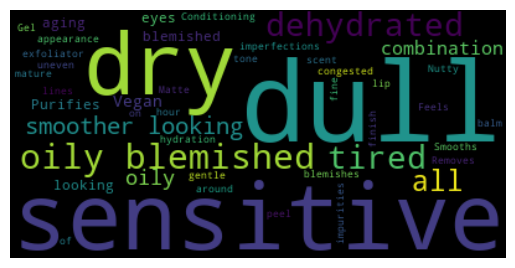

In [159]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

skintype = pd.DataFrame(products["Skin Type"])
skintype = skintype[~skintype.index.duplicated(keep="first")]

text = " ".join(stype for stype in skintype["Skin Type"])

wordcloud = WordCloud(stopwords = ["For", "skin", "lips", "types", "the", "to", "and"]).generate(text)

plt.axis("off")
plt.imshow(wordcloud, interpolation="bilinear")
plt.show()

Most common ingredients

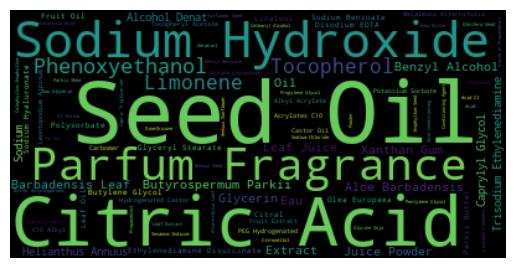

In [161]:
cingredients = pd.DataFrame(products["Ingredients List"].drop_duplicates())

itext = " ".join(ing for ing in cingredients["Ingredients List"])

iwordcloud = WordCloud(stopwords = ["Aqua", "Water"]).generate(itext)

plt.axis("off")
plt.imshow(iwordcloud, interpolation="bilinear")
plt.show()

_Q. Which products are available for sensitive skin?_

In [131]:
products[products["Skin Type"].str.contains("sensitive")].sort_values("Product Rating (out of 5)", ascending=False)

,Product Type,Skin Type,Product Size,Product Price,Product Rating (out of 5),Product Recommendation,Ingredients List,Size,Unit
Product Name,,,,,,,,,
Aloe Multi-Use Soothing Gel,Body Lotions,For sensitive skin,200 ML,32.0,4.9,0.87,"Aqua, Pentylene Glycol, Propanediol, Glycerin,...",200.0,ML
Camomile Sumptuous Cleansing Butter,Cleansers & Toners,For sensitive skin,20 ML,10.0,4.8,0.88,"Ethylhexyl Palmitate, Synthetic Wax, PEG-20 Gl...",20.0,ML
Camomile Sumptuous Cleansing Butter,Cleansers & Toners,For sensitive skin,90 ML,27.0,4.8,0.88,"Ethylhexyl Palmitate, Synthetic Wax, PEG-20 Gl...",90.0,ML
Aloe Soothing Night Cream,Night Care,For sensitive skin,50 ML,30.0,4.7,0.82,"Aqua, Glycerin, Pentylene Glycol, Caprylic/Cap...",50.0,ML
Mediterranean Almond Milk with Oats Instant Soothing Mask,Face Masks,For sensitive skin,75 ML,37.0,4.7,0.87,"Aqua / Water / Eau, Olea Europaea Fruit Oil / ...",75.0,ML
Aloe Calming Toner,Cleansers & Toners,For sensitive skin,250 ML,21.0,4.7,0.86,"Aqua, Pentylene Glycol, Sorbitol, Butylene Gly...",250.0,ML
Aloe Calming Foaming Wash,Cleansers & Toners,For sensitive skin,150 ML,21.0,4.7,0.82,"Aqua, Pentylene Glycol, Sodium Cocoamphoacetat...",150.0,ML
Aloe Calming Cream Cleanser,Cleansers & Toners,For sensitive skin,250 ML,21.0,4.6,0.80,"Aqua, Pentylene Glycol, Butylene Glycol, Capry...",250.0,ML
Aloe Soothing Moisture Lotion SPF15,Moisturisers,For sensitive skin,50 ML,28.0,4.6,0.84,"ACTIVE INGREDIENTS: Octisalate (5.0% w/w), Avo...",50.0,ML


In [132]:
#searching for sensitive skin friendly products that are alcohol and fragrance free

products[(products["Skin Type"].str.contains("sensitive")) & (~products["Ingredients List"].str.contains("Alcohol")) & (~products["Ingredients List"].str.contains("Parfum"))].sort_values("Product Rating (out of 5)", ascending=False)

,Product Type,Skin Type,Product Size,Product Price,Product Rating (out of 5),Product Recommendation,Ingredients List,Size,Unit
Product Name,,,,,,,,,
Aloe Multi-Use Soothing Gel,Body Lotions,For sensitive skin,200 ML,32.0,4.9,0.87,"Aqua, Pentylene Glycol, Propanediol, Glycerin,...",200.0,ML
Aloe Calming Toner,Cleansers & Toners,For sensitive skin,250 ML,21.0,4.7,0.86,"Aqua, Pentylene Glycol, Sorbitol, Butylene Gly...",250.0,ML
Aloe Calming Foaming Wash,Cleansers & Toners,For sensitive skin,150 ML,21.0,4.7,0.82,"Aqua, Pentylene Glycol, Sodium Cocoamphoacetat...",150.0,ML
Camomile Gentle Eye Make-Up Remover,Cleansers & Toners,For sensitive skin,250 ML,21.0,4.6,0.78,"Aqua, Glycerin, Polysorbate 20, Phenoxyethanol...",250.0,ML
Aloe Caring Roll-on Deodorant,Deodorants,For sensitive skin,50 ML,14.0,4.6,0.79,"Aqua, Aluminum Chlorohydrate, Steareth-2, PPG-...",50.0,ML


In [133]:
products[(~products["Ingredients List"].str.contains("Alcohol")) & (~products["Ingredients List"].str.contains("Parfum"))].sort_values("Product Recommendation", ascending=False)

,Product Type,Skin Type,Product Size,Product Price,Product Rating (out of 5),Product Recommendation,Ingredients List,Size,Unit
Product Name,,,,,,,,,
Tea Tree Anti-Imperfection Night Mask,Face Masks,"For oily, blemished skin",75 ML,25.0,4.6,0.87,"Aqua, Glycerin, Propanediol, Acrylates/Behene...",75.0,ML
Aloe Multi-Use Soothing Gel,Body Lotions,For sensitive skin,200 ML,32.0,4.9,0.87,"Aqua, Pentylene Glycol, Propanediol, Glycerin,...",200.0,ML
Aloe Calming Toner,Cleansers & Toners,For sensitive skin,250 ML,21.0,4.7,0.86,"Aqua, Pentylene Glycol, Sorbitol, Butylene Gly...",250.0,ML
Tea Tree Skin Clearing Foaming Cleanser,Cleansers & Toners,"For oily, blemished skin",150 ML,17.0,4.7,0.85,"Aqua, Cocamidopropyl Betaine, Polysorbate 20, ...",150.0,ML
Tea Tree Skin Clearing Body Wash,Shower Gels,"For oily, blemished skin",250 ML,13.0,4.7,0.83,"Aqua/Water (Solvent/Diluent), Sodium Laureth S...",250.0,ML
Tea Tree Squeaky-Clean Scrub,Exfoliators & Peels,"For oily, blemished skin",100 ML,18.0,4.7,0.82,"Aqua/Water/Eau, Sodium Laureth Sulfate, Glycer...",100.0,ML
Aloe Calming Foaming Wash,Cleansers & Toners,For sensitive skin,150 ML,21.0,4.7,0.82,"Aqua, Pentylene Glycol, Sodium Cocoamphoacetat...",150.0,ML
Aloe Caring Roll-on Deodorant,Deodorants,For sensitive skin,50 ML,14.0,4.6,0.79,"Aqua, Aluminum Chlorohydrate, Steareth-2, PPG-...",50.0,ML
Camomile Gentle Eye Make-Up Remover,Cleansers & Toners,For sensitive skin,250 ML,21.0,4.6,0.78,"Aqua, Glycerin, Polysorbate 20, Phenoxyethanol...",250.0,ML


Creating a recommendation system

In [134]:
# cleaning the Ingredients column

products[products["Ingredients List"].str.contains("INGREDIENTS")]

,Product Type,Skin Type,Product Size,Product Price,Product Rating (out of 5),Product Recommendation,Ingredients List,Size,Unit
Product Name,,,,,,,,,
Aloe Soothing Moisture Lotion SPF15,Moisturisers,For sensitive skin,50 ML,28.0,4.6,0.84,"ACTIVE INGREDIENTS: Octisalate (5.0% w/w), Avo...",50.0,ML
Aloe Soothing Moisture Lotion,Moisturisers,For sensitive skin,50 ML,28.0,4.6,0.66,"ACTIVE INGREDIENTS: Octisalate (5.0% w/w), Avo...",50.0,ML


In [135]:
products["Ingredients List"] = products["Ingredients List"].replace("\w*ACTIVE ", "", regex=True)
products["Ingredients List"] = products["Ingredients List"].replace("INGREDIENTS: ", "", regex=True)

products[products["Ingredients List"].str.contains("ACTIVE")]

,Product Type,Skin Type,Product Size,Product Price,Product Rating (out of 5),Product Recommendation,Ingredients List,Size,Unit
Product Name,,,,,,,,,


In [136]:
prod_desc = pd.DataFrame(products["Ingredients List"].drop_duplicates())

In [137]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

count = CountVectorizer()
count_matrix = count.fit_transform(prod_desc["Ingredients List"])
cosine_sim = cosine_similarity(count_matrix, count_matrix)


indices = pd.Series(prod_desc.index)

def get_recommendations(item, cosine_sim=cosine_sim):
    #retrieving index of product that matches name
    idx = indices[indices == item].index[0]

    #getting similarity scores of all products relating to chosen product and sorting in ascending order
    scores = pd.Series(cosine_sim[idx])
    scores = scores.sort_values(ascending= False)

    #retrieving top 5 products (including all related information)
    top_5 = list(scores.iloc[1:6].index)

    recommended_items = []

    for i in top_5:
        recommended_items.append(list(prod_desc.index)[i])

    

    return products.loc[recommended_items, :]


In [164]:
get_recommendations("Aloe Calming Cream Cleanser")

,Product Type,Skin Type,Product Size,Product Price,Product Rating (out of 5),Product Recommendation,Ingredients List,Size,Unit
Product Name,,,,,,,,,
Aloe Soothing Moisture Lotion SPF15,Moisturisers,For sensitive skin,50 ML,28.0,4.6,0.84,"Octisalate (5.0% w/w), Avobenzone (3.0% w/w), ...",50.0,ML
Aloe Soothing Night Cream,Night Care,For sensitive skin,50 ML,30.0,4.7,0.82,"Aqua, Glycerin, Pentylene Glycol, Caprylic/Cap...",50.0,ML
Aloe Multi-Use Soothing Gel,Body Lotions,For sensitive skin,200 ML,32.0,4.9,0.87,"Aqua, Pentylene Glycol, Propanediol, Glycerin,...",200.0,ML
Drops of Light™ Pure Healthy Brightening Eye Cream,Eye Care,For dull skin,15 ML,39.0,4.0,0.66,"Aqua / Water / Eau, C12-15 Alkyl Benzoate, But...",15.0,ML
Aloe Calming Toner,Cleansers & Toners,For sensitive skin,250 ML,21.0,4.7,0.86,"Aqua, Pentylene Glycol, Sorbitol, Butylene Gly...",250.0,ML
